In [1]:
from QuadFinder import QuadMotifFinder
from IPython.display import clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

plt.style.use('fivethirtyeight')
def clean_axis(ax):
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(which='major', linestyle='--', alpha=0.5)
    return True


In [2]:
def comp(s):
    nuc_map = {'A':'T', 'T':'A', 'G':'C', 'C':'G', 'N': 'N'}
    return ''.join([nuc_map[i.upper()] for i in s])

oq_sequences = []
change_point_positions = []
with open('../data/oq_switchpoints/Na_K_1_unique_with_sam_data.bed') as h:
    for n,l in enumerate(h):
        print ('\r%d' % n, end='')
        c = l.rstrip('\n').split('\t')
        p = int(c[1]) - int(c[4])
        s = c[6]
        if c[5] == '-':
            s = s[::-1]
            p = (len(s)-p-1)
            oq_sequences.append(s) 
            change_point_positions.append(p)
        if c[5] == "+":
            s = comp(s)
            oq_sequences.append(s) 
            change_point_positions.append(p)
clear_output()

100%|██████████| 83779/83779 [00:05<00:00, 14440.71it/s]


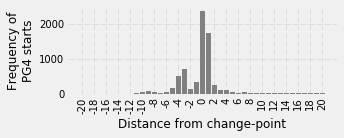

3 7845 7262 2372 1747 0.32663178187827047 0.24056733682181217 0.5671991187000827


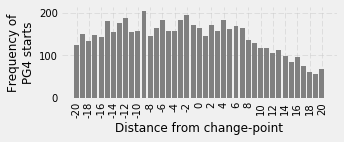

  1%|▏         | 1093/83779 [00:00<00:07, 10928.71it/s]

3 7845 5837 163 146 0.02792530409456913 0.025012849066301183 0.05293815316087031


100%|██████████| 83779/83779 [00:06<00:00, 12346.80it/s]


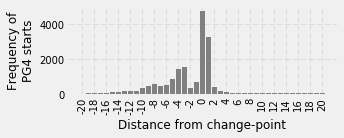

7 19599 17559 4768 3273 0.27154165954781023 0.1864001366820434 0.45794179622985365


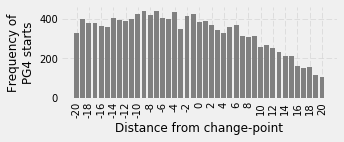

  1%|          | 800/83779 [00:00<00:10, 7990.96it/s]

7 19599 13501 383 387 0.028368269017109843 0.02866454336715799 0.05703281238426783


100%|██████████| 83779/83779 [00:08<00:00, 9698.21it/s] 


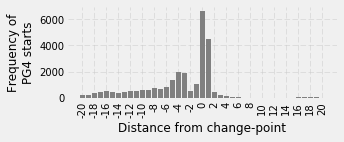

15 32776 26726 6630 4468 0.24807303749158124 0.16717802888572925 0.41525106637731046


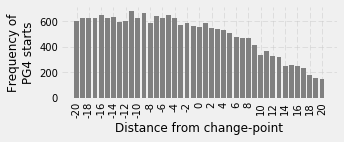

  1%|          | 606/83779 [00:00<00:13, 6053.15it/s]

15 32776 20364 557 586 0.027352190139461795 0.028776271852288354 0.056128461991750145


100%|██████████| 83779/83779 [00:10<00:00, 7833.99it/s]


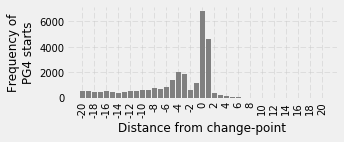

25 39319 28025 6821 4588 0.24338983050847457 0.16371097234611953 0.4071008028545941


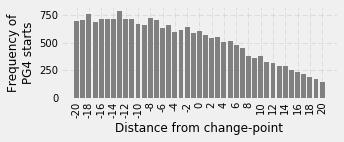

25 39319 21481 605 570 0.028164424375029095 0.02653507751035799 0.05469950188538708


In [18]:
for ls in [3, 7, 15, 25]:

    distances = []
    random_distances = []
    min_pos = min(change_point_positions)
    max_pos = max(change_point_positions)

    for p,s in tqdm(zip(change_point_positions, oq_sequences), total=len(oq_sequences)):
        rp = np.random.randint(min_pos, max_pos)
        q = QuadMotifFinder([s], stem=3, loop_start=1, loop_stop=ls, greedy=True,
                        bulge=0, is_seq=True, strands=['+'], verbose=False)
        q.run()
        for i in q.resNov:
            q = int(i.split('\t')[1])
            distances.append(q-p)
            random_distances.append(q-rp)
    distances = np.array(distances)
    random_distances = np.array(random_distances)
    
    for d,l in zip([distances, random_distances], ['real', 'random']):
        c = Counter(d[(d <= 20) & (d >= -20)])

        fig, ax = plt.subplots(1, 1, figsize=(5,2.2))
        ind = range(-20,21,1)
        ax.bar(ind, [c[x] for x in ind], color='grey')
        ax.set_xticks(range(-20, 21, 2))
        ax.set_xticklabels(range(-20, 21, 2), rotation=90)
        ax.set_xlabel('Distance from change-point', fontsize=12)
        ax.set_ylabel('Frequency of\nPG4 starts', fontsize=12)
        clean_axis(ax)
        plt.tight_layout()
        plt.savefig('../images/change_point_G3L%dB0_%s.svg' % (ls, l),
                    transparent=True, edgecolor='none')
        plt.show()
        print (ls, len(distances), sum(c.values()), c[0], c[1],
               c[0]/sum(c.values()), c[1]/sum(c.values()),
                c[0]/sum(c.values()) + c[1]/sum(c.values()))